# Setup

In [1]:
import os

CONFIG_PATH = "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py"
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
WEIGHTS_PATH = 'groundingdino_swint_ogc.pth'

In [4]:
from groundingdino.util.inference import Model

/home/shared/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/shared/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-10-05 17:08:28.035101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 17:08:28.135441: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for

In [9]:
model = Model(model_config_path=CONFIG_PATH, model_checkpoint_path=WEIGHTS_PATH)

final text_encoder_type: bert-base-uncased


In [5]:
import cv2

In [6]:
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

# Ala bala

In [8]:
def detect_objects(img_path, classes):
    image = cv2.imread(img_path)
    caption = ". ".join(classes)
    
    detections, labels = model.predict_with_caption(
        image=image,
        caption=caption,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )
    print(f"Len detections: {len(detections)}")
    
    box_annotator = sv.BoxAnnotator()
    labels = [
        f"{label} {confidence:0.2f}" 
        for label, (_, confidence, class_id, _) 
        in zip(labels, detections)]
    annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)
    
    
    %matplotlib inline
    sv.plot_image(annotated_frame, (16, 16))
    

In [7]:
import supervision as sv

Len detections: 2


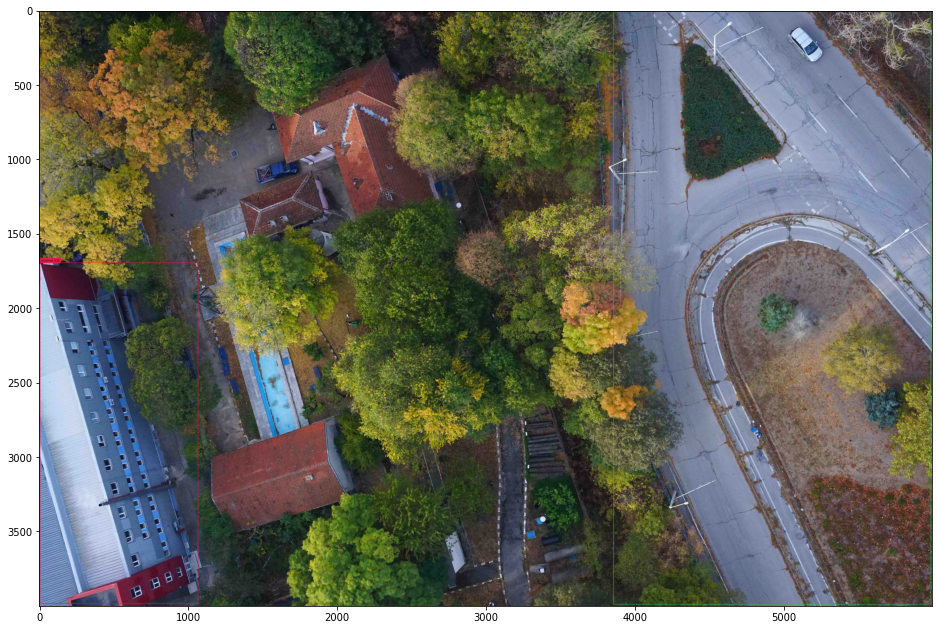

In [39]:
detect_objects(path, ['crossroad'])

Len detections: 1


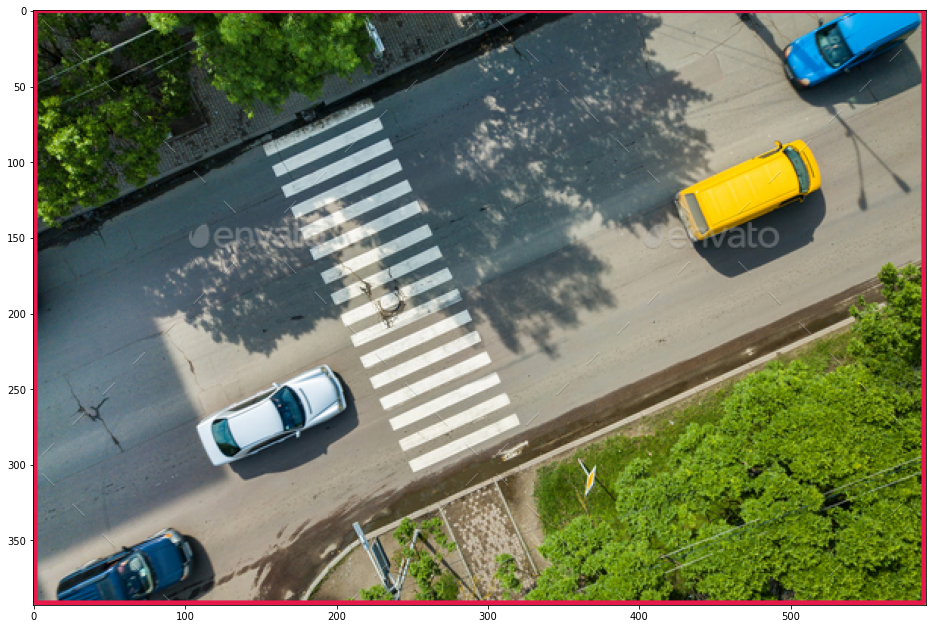

In [21]:
detect_objects('crosswalk.jpg', ['road'])

# Langsam Crosswalk

In [8]:
%load_ext autoreload
%autoreload 2
import sys
import inject
sys.path.append('/home/suzunov/projects/scene-understanding/')
    
from PIL import Image
import PIL
from scene_understanding.object_detectors.coco.coco_object_detector import CocoObjectDetector
from dotenv import load_dotenv
from scene_understanding.util.di_config import di_config
from scene_understanding.segmentation.lang_sam import LangSAM

load_dotenv("env.txt")
inject.configure(di_config)

/home/shared/.local/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [9]:
langsam = LangSAM('cuda')

/home/shared/.local/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/home/shared/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
path = "/NAS/prod_platform_data/twins/37989/sourceImages_medium/Section 9__2BackCamera__B_01_02108_d0f507.JPG"

In [12]:
test_img = cv2.imread(path)

In [13]:
def resize_image_by_factor(img, scale_factor):
    if img is None:
        raise FileNotFoundError(f"The image at path '{image_path}' was not found.")
    
    # Calculate new dimensions
    new_width = int(img.shape[1] * scale_factor)
    new_height = int(img.shape[0] * scale_factor)
    
    # Resize the image
    resized_img = cv2.resize(img, (new_width, new_height))
    
    return resized_img

In [14]:
path = "crosswalk.jpg"
#path = "crosswalk.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = resize_image_by_factor(img, 0.2)
pil = Image.fromarray(img)

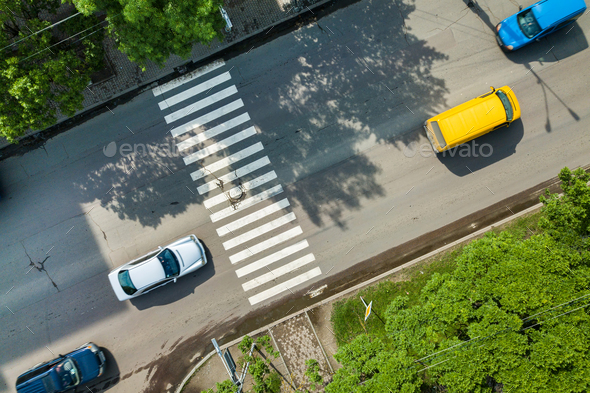

In [18]:
pil

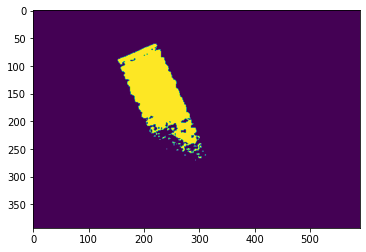

In [26]:
masks, boxes, phrases, logits = langsam.predict(pil, 'crosswalk')
plt.imshow(masks[0])

# Langsam Crossroad

In [16]:
import random
from ruse_images_dataset import 

In [18]:
# Find a random image
dataset = ds(use_thumbs=True)  
rand_idx = random.randint(0, len(ds))
meta, image, json_idx, idx, twin_id = ds[rand_idx]
print("Image Name: " + meta['name'])
print("Twin ID: " + twin_id)
path = "/NAS/prod_platform_data/twins/" + twin_id + "/sourceImages_medium/" + meta['name']
print(path)
Image.fromarray(image)

NameError: name 'ds' is not defined

In [23]:
#path = "crosswalk.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = resize_image_by_factor(img, 0.2)
pil = Image.fromarray(img)

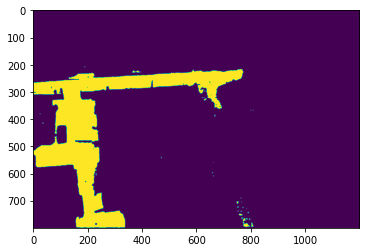

In [24]:
masks, boxes, phrases, logits = langsam.predict(pil, 'road')
plt.imshow(masks[0])